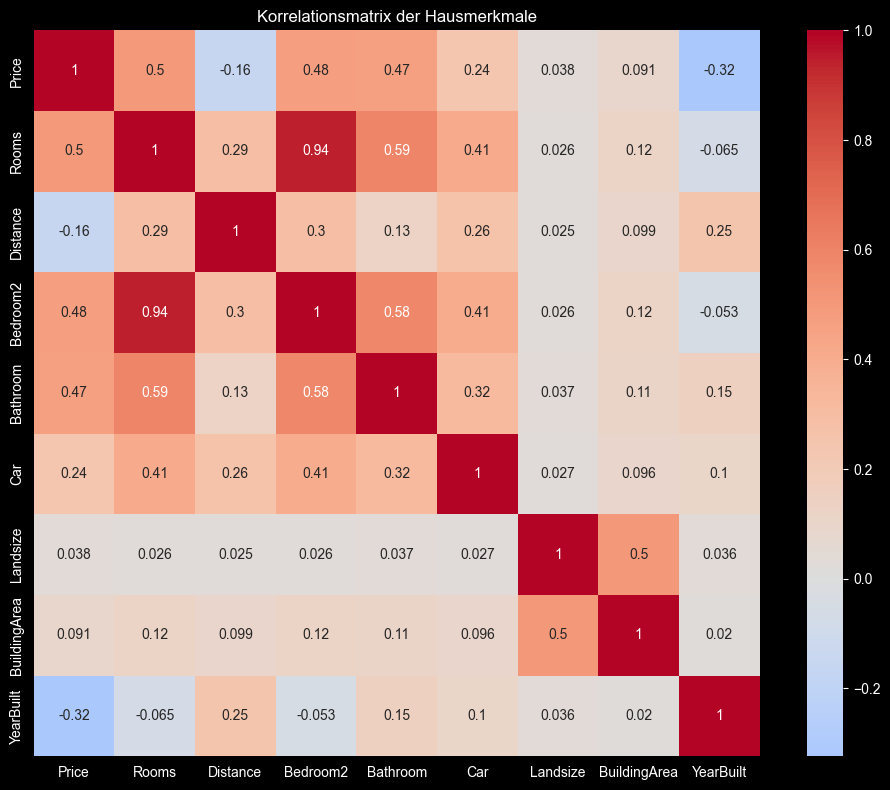

In [6]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Code you have previously used to load data
import pandas as pd

# Path of the file to read
# Aktuelles Verzeichnis anzeigen
current_dir = os.getcwd()

# Verschiedene mögliche Pfade zur CSV-Datei prüfen
possible_paths = [
    os.path.join(current_dir, 'input', 'melb_data.csv'),
    os.path.join(current_dir, '..', 'input', 'melb_data.csv'),
    os.path.join(os.path.dirname(current_dir), 'input', 'melb_data.csv'),
    os.path.join(current_dir, 'melb_data.csv'),
    os.path.join(current_dir, '..', 'melb_data.csv')
]

csv_path = None
for path in possible_paths:
    if os.path.exists(path):
        csv_path = path
        print(f"CSV-Datei gefunden unter: {csv_path}")
        break
    else:
        print(f"Pfad nicht gefunden: {path}")

if csv_path is None:
    print("Verfügbare Dateien im aktuellen Verzeichnis:")
    for item in os.listdir(current_dir):
        print(f"  {item}")

    if os.path.exists(os.path.join(current_dir, '..')):
        print("\nVerfügbare Dateien im übergeordneten Verzeichnis:")
        for item in os.listdir(os.path.join(current_dir, '..')):
            print(f"  {item}")

    raise FileNotFoundError("melb_data.csv konnte nicht gefunden werden. Bitte überprüfen Sie den Dateipfad.")

home_data = pd.read_csv(csv_path)

pd.DataFrame(home_data).head()

# Daten für Visualisierung vorbereiten (nur Zeilen ohne fehlende Koordinaten)
viz_data = home_data.dropna(subset=['Lattitude', 'Longtitude', 'Price'])

# Hexbin Heatmap für bessere Darstellung bei vielen Datenpunkten
plt.figure(figsize=(12, 8))
plt.hexbin(viz_data['Longtitude'], viz_data['Lattitude'],
           C=viz_data['Price'], gridsize=30, cmap='YlOrRd', reduce_C_function=np.mean)
plt.colorbar(label='Durchschnittspreis ($)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Heatmap: Durchschnittliche Hauspreise nach geografischer Lage')
plt.tight_layout()
plt.show()

# Korrelationsmatrix der numerischen Features
plt.figure(figsize=(10, 8))
numeric_features = ['Price', 'Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
                    'YearBuilt']
correlation_data = viz_data[numeric_features].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Korrelationsmatrix der Hausmerkmale')
plt.tight_layout()
plt.show()


Der Benutzer möchte wissen, wie er mit NaN-Werten in der Spalte 'YearBuilt' umgehen kann. Ich werde den Code so modifizieren, dass er Informationen über die NaN-Werte in dieser Spalte anzeigt.



In [7]:
pd.DataFrame(home_data).head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [8]:
# # Median für YearBuilt berechnen und NaN-Werte ersetzen
# median_year = home_data['YearBuilt'].median()
# print(f"Median für YearBuilt: {median_year}")
#
# # NaN-Werte mit Median ersetzen
# home_data['YearBuilt'] = home_data['YearBuilt'].fillna(median_year)
#
# # Informationen nach der Änderung anzeigen
# print("\nInformationen nach dem Ersetzen der NaN-Werte:")
# print(f"Anzahl NaN-Werte: {home_data['YearBuilt'].isna().sum()}")
# print(f"Prozent NaN-Werte: {(home_data['YearBuilt'].isna().sum() / len(home_data)) * 100:.2f}%")
# print(f"Gesamt Zeilen: {len(home_data)}")


In [9]:
import folium
from folium.plugins import HeatMap

# Melbourne Zentrum Koordinaten
melbourne_center = [-37.8136, 144.9631]

# Karte von Melbourne erstellen
m = folium.Map(
    location=melbourne_center,
    zoom_start=11,
    tiles='OpenStreetMap'
)

# Heatmap Layer für Hauspreise hinzufügen
heat_data = [[row['Lattitude'], row['Longtitude'], row['Price']]
             for idx, row in viz_data.iterrows()]

HeatMap(heat_data, radius=10, blur=15).add_to(m)

# Karte anzeigen
m